In [11]:
# Load and Convert Raster Files Code
# Section 1: Imports

import numpy as np
import rasterio
import os
import matplotlib
import matplotlib.pyplot as plt


In [4]:

# Section 2: Function Definition - loadDataSet

def loadDataSet(folder_path):
    '''
    Loads all the .tiff files into an array.

    Parameters:
        folder_path: a path to the .tiff file (Raster images)

    Returns:
        An array of raster images
    '''
    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter files with a .tiff or .tif extension
    tiff_files = [file for file in files if file.lower().endswith('.tiff') or file.lower().endswith('.tif')]

    # Construct the full paths to the TIFF files
    tiff_paths = [os.path.join(folder_path, tiff_file) for tiff_file in tiff_files]

    return tiff_paths

In [6]:
# Section 3: Function Definition - convertImage

def convertImage(rasterImage):
    '''
    Converts a raster image to a tensor with 4 bands(RGB-NIR) of dimensions rasterImage.Height x rasterImage.width

    Parameters:
        rasterImage: 

    Returns:
        A tensor
    '''
    imgArray = np.zeros((rasterImage.height, rasterImage.width, rasterImage.count))

    # Fill the array with RGBNIR values
    for i in range(4):
        imgArray[:, :, i] = rasterImage.read(i + 1)

    return imgArray

In [7]:
# Section 4: Function Definition - convertImages

def convertImages(rasterPaths):
    '''
    Convert an array of raster images numpy array of tensors

    Parameters:
        rasterPaths

    Returns:
        An array of tensors
    '''
    images = []

    for path in rasterPaths:
        rasterImage = rasterio.open(path)
        images.append(convertImage(rasterImage))

    return images

In [8]:
# Section 5: Example Usage

# Path to your TIFF files folder
folder_path = 'C:/DSS/DSS FOLDER 1 11TH NOV/DSS-MANTIS-OBC-AI/Images/tree-phen/trees_feb2020-Dec2021_10m'

# Load TIFF paths
tiff_paths = loadDataSet(folder_path)

# Convert TIFFs to NumPy arrays
image_tensors = convertImages(tiff_paths)

c:\Users\conta\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


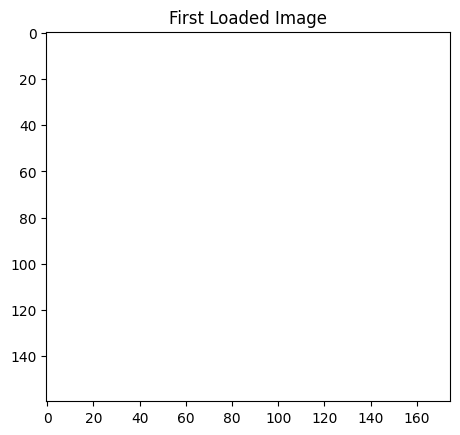

In [12]:
# Section 6: Displaying Loaded Images (Optional)

# Optional: Display the loaded images
import matplotlib.pyplot as plt

# Plot the first image
plt.imshow(image_tensors[0])
plt.title('First Loaded Image')
plt.show()